In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import scipy.stats as stats


In [2]:
data=pd.read_csv('online_shoppers_intention.csv')

In [3]:
data.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,Feb,2,2,1,3,Returning_Visitor,False,False
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,Feb,1,2,1,5,Returning_Visitor,True,False
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.000000,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.000000,0.4,Feb,2,4,1,2,Returning_Visitor,False,False


In [4]:
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [5]:
data.shape

(12330, 18)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [7]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [8]:
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

In [9]:
data.describe()


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


<AxesSubplot:xlabel='VisitorType', ylabel='count'>

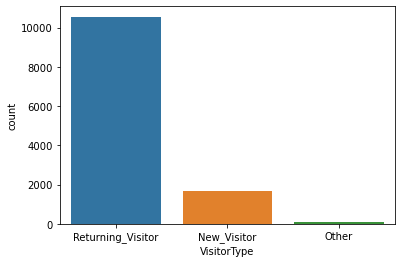

In [10]:
sns.countplot('VisitorType',data=data)

<AxesSubplot:xlabel='Month', ylabel='count'>

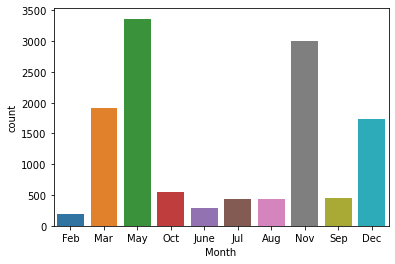

In [11]:
sns.countplot('Month',data=data)

<AxesSubplot:xlabel='Weekend', ylabel='count'>

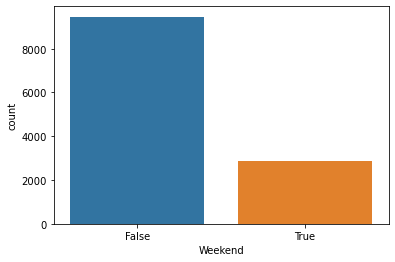

In [12]:
sns.countplot('Weekend',data=data)

<AxesSubplot:xlabel='Revenue', ylabel='count'>

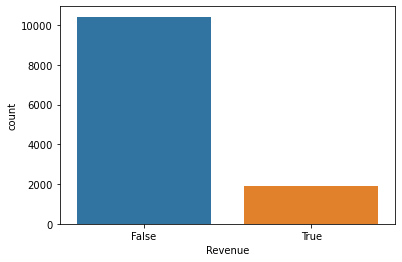

In [13]:
sns.countplot('Revenue',data=data)

In [14]:
data.dropna(axis=0,inplace=True)

In [15]:
data.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [16]:
data.shape

(12316, 18)

In [17]:
data=data.replace({'Feb':2, 'Mar':3, 'May':5, 'Oct':10, 'June':6, 'Jul':7, 'Aug':8, 'Nov':11, 'Sep':9,
       'Dec':10})


In [18]:
data=data.replace({'Returning_Visitor':0, 'New_Visitor':1, 'Other':2})

In [19]:
data=data*1


In [20]:
data.dtypes

Administrative             float64
Administrative_Duration    float64
Informational              float64
Informational_Duration     float64
ProductRelated             float64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                        int64
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                  int64
Weekend                      int32
Revenue                      int32
dtype: object

In [21]:
data.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,0,0,0
6,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.4,2,2,4,3,3,0,0,0
7,1.0,-1.0,0.0,-1.0,1.0,-1.000000,0.200000,0.200000,0.000000,0.0,2,1,2,1,5,0,1,0
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.000000,0.8,2,2,2,2,3,0,0,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.000000,0.4,2,2,4,1,2,0,0,0


In [22]:
##removing negative values from numerical columns
def handle0nneg(num):
    if num <= 0:
        return 0
    else:
        return num
data['Administrative_Duration'] = [handle0nneg(x) for x in data.Administrative_Duration]
data['Administrative'] = [handle0nneg(x) for x in data.Administrative]
data['Informational'] = [handle0nneg(x) for x in data.Informational]
data['Informational_Duration'] = [handle0nneg(x) for x in data.Informational_Duration]
data['ProductRelated'] = [handle0nneg(x) for x in data.ProductRelated]
data['ProductRelated_Duration'] = [handle0nneg(x) for x in data.ProductRelated_Duration]
data['BounceRates'] = [handle0nneg(x) for x in data.BounceRates]
data['ExitRates'] = [handle0nneg(x) for x in data.ExitRates]
data['PageValues'] = [handle0nneg(x) for x in data.PageValues]
data['SpecialDay'] = [handle0nneg(x) for x in data.SpecialDay]





In [23]:
data.head(50)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,0,0,0
2,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,0,1,0
5,0.0,0.0,0.0,0.0,19.0,154.216667,0.015789,0.024561,0.000000,0.0,2,2,2,1,3,0,0,0
6,0.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.4,2,2,4,3,3,0,0,0
7,1.0,0.0,0.0,0.0,1.0,0.000000,0.200000,0.200000,0.000000,0.0,2,1,2,1,5,0,1,0
8,0.0,0.0,0.0,0.0,2.0,37.000000,0.000000,0.100000,0.000000,0.8,2,2,2,2,3,0,0,0
9,0.0,0.0,0.0,0.0,3.0,738.000000,0.000000,0.022222,0.000000,0.4,2,2,4,1,2,0,0,0


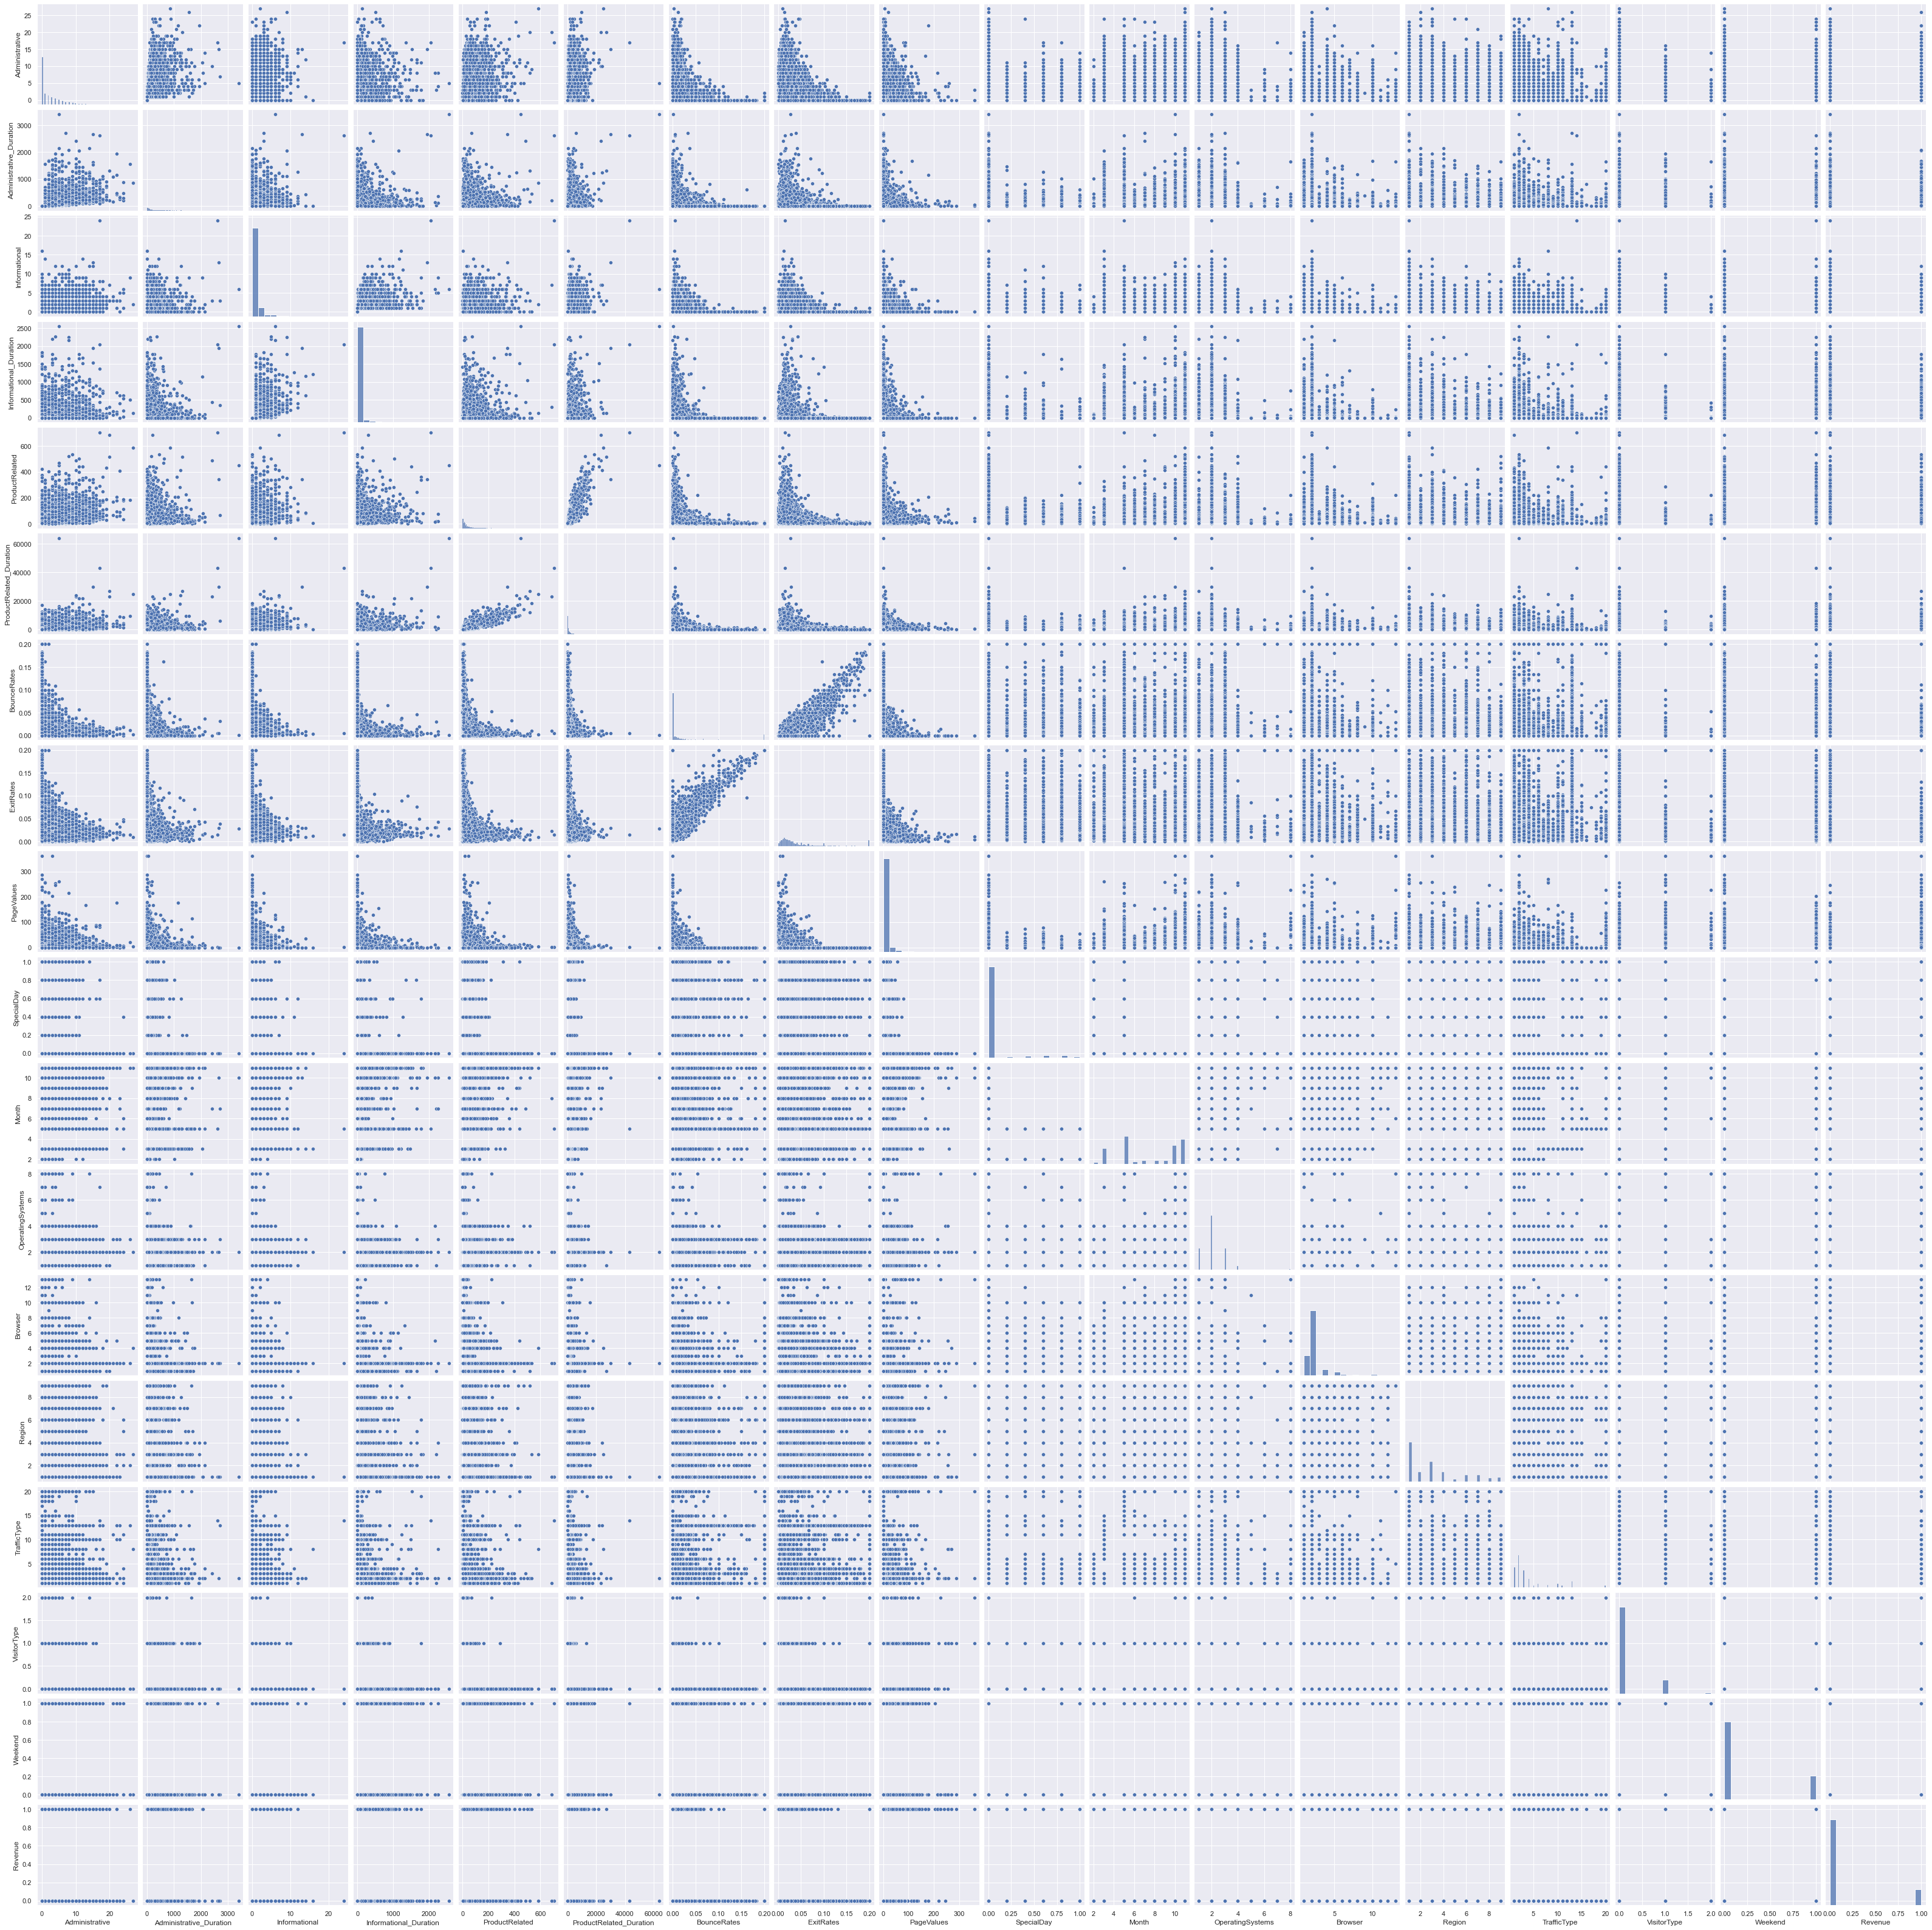

In [29]:
sns.pairplot(data)

<AxesSubplot:>

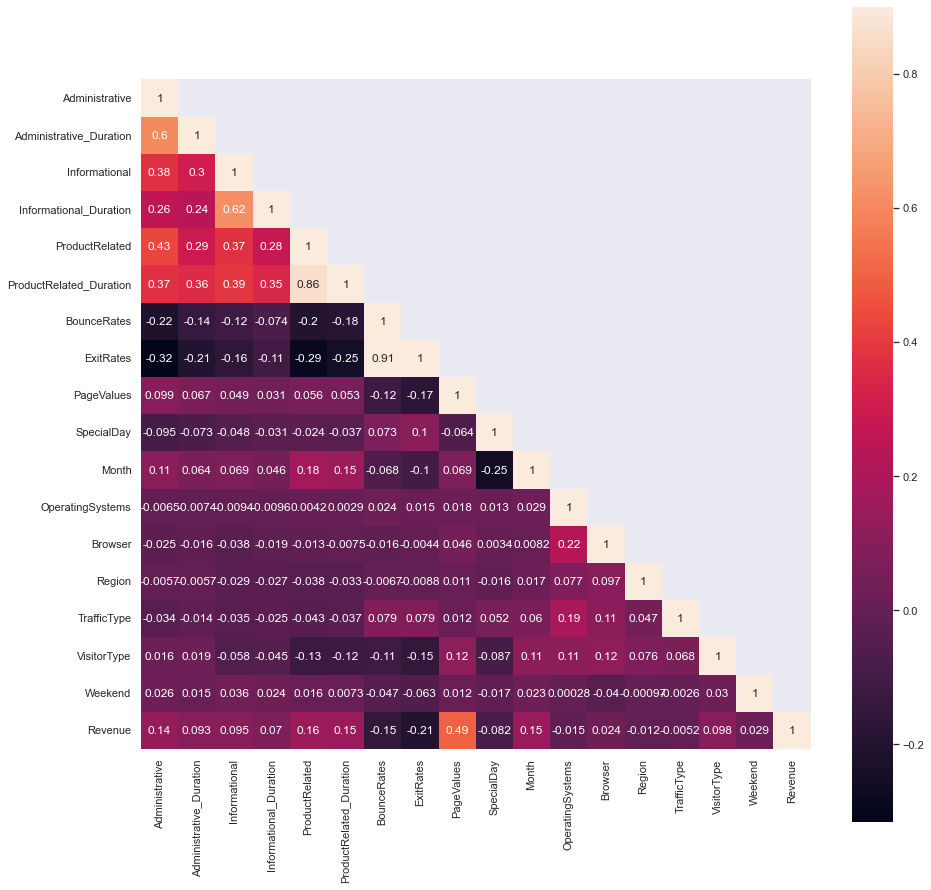

In [30]:
#create correlation
corr = data.corr(method = 'pearson')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(15,15)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

#### Page vlue has a best correlation with revenue

In [31]:
unused=['Revenue']
data=data.drop(columns=unused)
data.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend'],
      dtype='object')

No handles with labels found to put in legend.


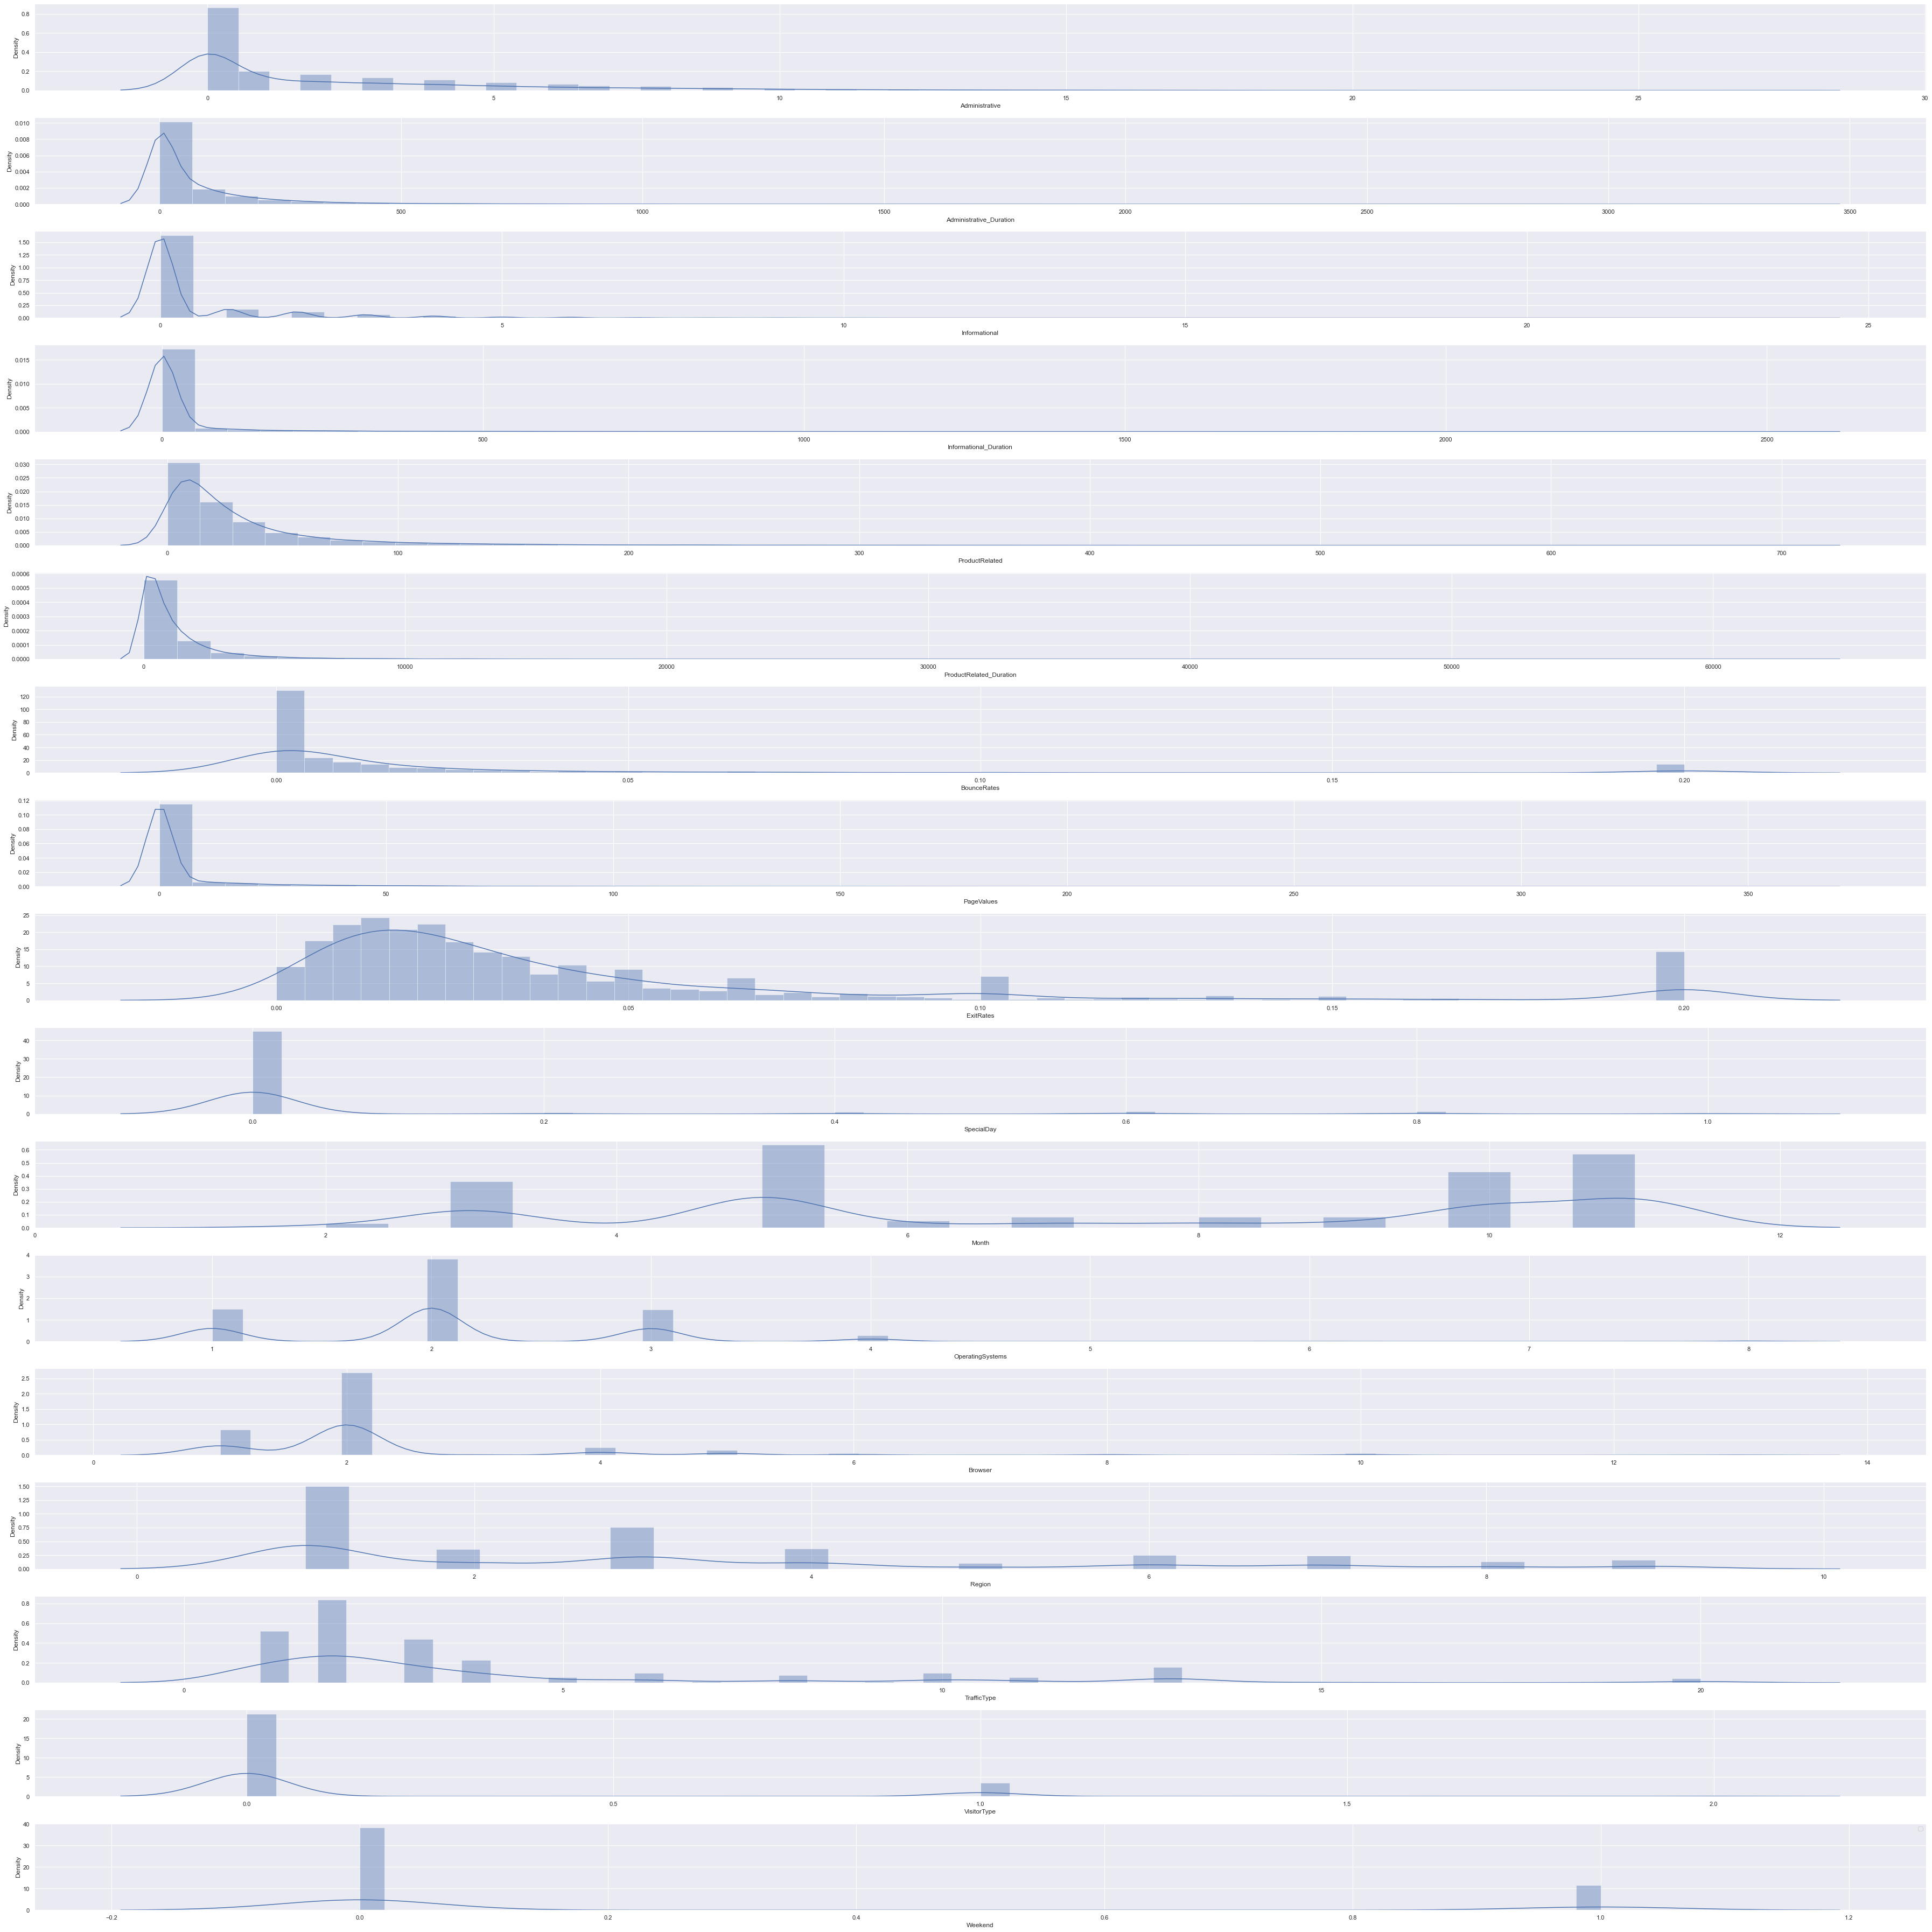

In [32]:
fig, (ax1, ax2, ax3, ax4,ax5,ax6,ax7,ax8,ax9,ax10,ax11,ax12,ax13,ax14,ax15,ax16,ax17) = plt.subplots(17,1, figsize=(50,50))
sns.distplot(data["Administrative"], ax=ax1)
sns.distplot(data["Administrative_Duration"], ax=ax2)
sns.distplot(data["Informational"], ax=ax3)
sns.distplot(data["Informational_Duration"], ax=ax4)
sns.distplot(data["ProductRelated"], ax=ax5)
sns.distplot(data["ProductRelated_Duration"], ax=ax6)
sns.distplot(data["BounceRates"], ax=ax7)
sns.distplot(data["PageValues"], ax=ax8)
sns.distplot(data["ExitRates"], ax=ax9)
sns.distplot(data["SpecialDay"], ax=ax10)
sns.distplot(data["Month"], ax=ax11)
sns.distplot(data["OperatingSystems"], ax=ax12)
sns.distplot(data["Browser"], ax=ax13)
sns.distplot(data["Region"], ax=ax14)
sns.distplot(data["TrafficType"], ax=ax15)
sns.distplot(data["VisitorType"], ax=ax16)
sns.distplot(data["Weekend"], ax=ax17)
plt.tight_layout()
plt.legend()

In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(data)

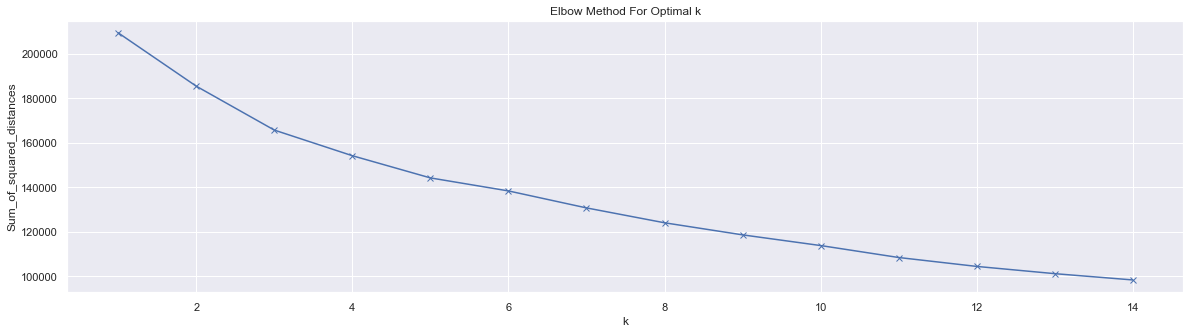

In [34]:
from sklearn.cluster import KMeans

Sum_of_squared_distances = []

K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(cluster_scaled)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.figure(figsize=(20,5))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [36]:
model = KMeans(n_clusters=3)
model.fit(cluster_scaled)
kmeans_labels = model.labels_


In [37]:
DS2_clustered_kmeans = data.assign(Cluster=kmeans_labels) # back apply
grouped_kmeans = DS2_clustered_kmeans.groupby(['Cluster']).mean().round(1)
grouped_kmeans

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Cluster,,,,,,,,,,,,,,,,,
0,1.7,51.1,0.2,8.2,23.7,866.2,0.0,0.0,5.9,0.1,7.3,2.1,2.4,3.2,4.0,0.2,0.2
1,7.3,303.9,2.5,208.9,96.7,3827.5,0.0,0.0,9.8,0.0,8.5,2.1,2.2,2.9,3.6,0.1,0.3
2,0.1,1.5,0.0,0.1,3.2,61.0,0.2,0.2,0.0,0.1,6.6,2.2,2.3,3.0,5.1,0.1,0.2


In [38]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth=estimate_bandwidth(cluster_scaled, quantile=0.2)
print("BW is",bandwidth)

analyzer = MeanShift(bandwidth) 
analyzer.fit(cluster_scaled)
labels = analyzer.labels_


labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)

BW is 4.23232994384117
number of estimated clusters : 71


In [39]:
Dt_clustered_ms = data.assign(Cluster=labels)
grouped_ms = Dt_clustered_ms.groupby(['Cluster']).mean().round(1)
grouped_ms

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Cluster,,,,,,,,,,,,,,,,,
0,2.0,62.4,0.4,17.2,26.8,983.3,0.0,0.0,4.7,0.1,7.3,2.1,2.3,3.1,4.0,0.1,0.2
1,2.2,62.8,0.2,1.3,11.8,654.7,0.0,0.0,18.4,0.0,10.0,7.9,13.0,9.0,19.9,2.0,0.0
2,6.3,178.4,3.1,273.4,213.1,8136.3,0.0,0.0,4.9,0.0,10.1,2.1,2.1,1.9,2.8,0.0,0.2
3,1.9,58.2,0.2,9.2,32.9,981.5,0.0,0.0,220.6,0.0,8.2,2.0,2.3,3.9,3.5,0.6,0.3
4,0.0,0.0,0.0,0.0,1.0,0.0,0.2,0.2,0.0,0.0,10.4,8.0,10.2,9.0,15.6,1.9,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.0,0.0,4.0,225.8,222.0,9630.2,0.1,0.1,0.0,0.0,6.0,8.0,13.0,9.0,5.0,2.0,0.0
67,1.2,41.6,0.5,89.6,24.1,917.0,0.0,0.0,119.3,0.0,6.9,1.9,2.6,3.4,2.7,0.7,0.3
68,0.0,0.0,0.0,0.0,44.0,784.9,0.0,0.0,361.0,0.0,10.0,8.0,13.0,9.0,20.0,2.0,0.0


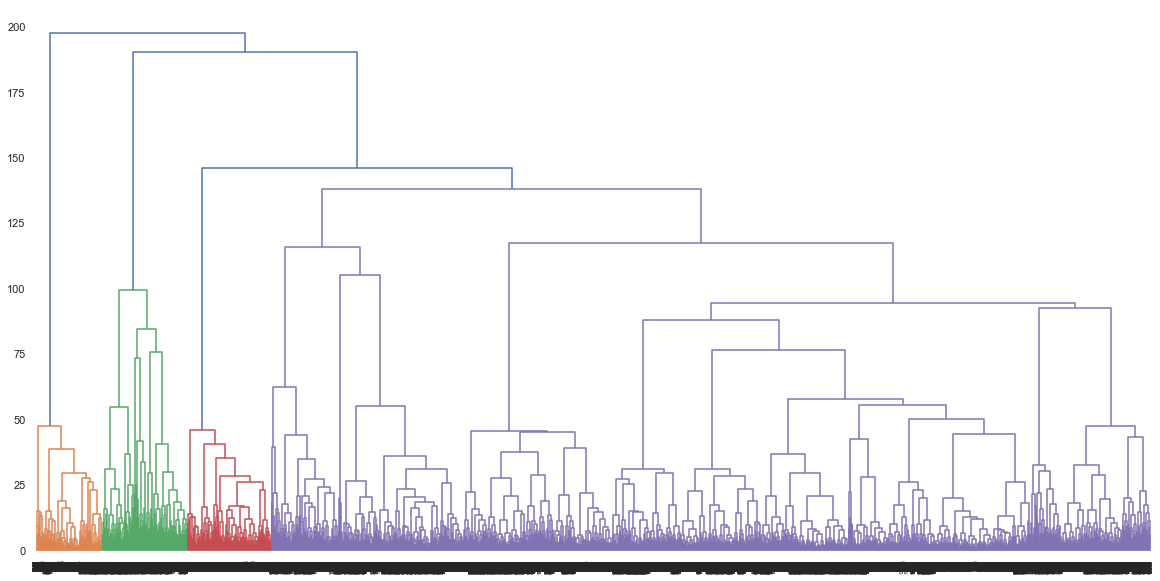

In [40]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(20,10))
dendrogram = sch.dendrogram(sch.linkage(cluster_scaled, method='ward'))

In [41]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=3)
model.fit(cluster_scaled)
hac_labels = model.labels_


In [42]:
Dt_clustered_hac = data.assign(Cluster=hac_labels)
grouped_hac = Dt_clustered_hac.groupby(['Cluster']).mean().round(1)
grouped_hac

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Cluster,,,,,,,,,,,,,,,,,
0,2.1,67.8,0.3,12.7,26.6,973.3,0.0,0.0,6.3,0.1,7.3,2.1,2.4,3.2,4.1,0.2,0.2
1,0.0,0.0,0.0,0.0,1.8,13.9,0.2,0.2,0.0,0.1,6.5,2.0,2.2,3.1,4.5,0.1,0.2
2,6.5,295.4,3.1,310.9,114.2,4685.9,0.0,0.0,5.7,0.0,8.4,2.1,2.1,2.8,3.2,0.0,0.2


In [43]:
from sklearn.cluster import DBSCAN

model = DBSCAN(eps=0.4, min_samples=6)
model.fit(cluster_scaled)
dbs_labels = model.labels_

labels_unique = np.unique(dbs_labels)
n_clusters_ = len(labels_unique)
# print the labels of each data 
print("number of estimated clusters : %d" % n_clusters_)

number of estimated clusters : 32


In [44]:
Dt_clustered_db = data.assign(Cluster=dbs_labels)
grouped_db = Dt_clustered_db.groupby(['Cluster']).mean().round(1)
grouped_db

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Cluster,,,,,,,,,,,,,,,,,
-1,2.4,83.7,0.5,35.7,32.6,1229.0,0.0,0.0,6.1,0.1,7.4,2.1,2.4,3.2,4.1,0.2,0.2
0,0.1,0.8,0.0,0.0,8.3,257.4,0.0,0.0,0.0,0.0,2.9,2.0,2.0,1.0,1.7,0.0,0.0
1,0.0,0.0,0.0,0.0,1.2,0.0,0.2,0.2,0.0,0.0,3.0,2.0,2.0,1.0,1.4,0.0,0.0
2,0.0,0.0,0.0,0.0,1.1,0.0,0.2,0.2,0.0,0.0,2.8,3.0,2.0,3.0,1.8,0.0,0.0
3,0.0,0.0,0.0,0.0,13.7,435.8,0.0,0.0,0.0,0.0,3.0,2.0,2.0,4.0,2.8,0.0,0.0
4,0.2,1.9,0.0,0.0,6.5,197.8,0.0,0.0,0.0,0.0,3.0,1.0,1.0,1.0,2.3,0.0,1.0
5,0.0,0.0,0.0,0.0,6.2,177.3,0.0,0.0,0.0,0.0,2.9,2.0,2.0,3.0,1.8,0.0,0.0
6,0.0,0.0,0.0,0.0,12.0,545.7,0.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,1.5,0.0,0.0
7,0.0,0.0,0.0,0.0,5.4,161.3,0.0,0.0,0.0,0.0,3.0,3.0,2.0,1.0,1.0,0.0,0.0


In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
 
X_train = cluster_scaled

In [46]:
gmm = GaussianMixture(n_components=3, covariance_type='full', random_state=42 )
gmm.fit(X_train)
gmmlabels = gmm.predict(X_train)




print(gmm.means_)
print('\n')
print(gmm.covariances_)

[[ 0.29080658  0.09806549 -0.39663062 -0.24505957 -0.02936033 -0.05969869
  -0.29988609 -0.39070483  0.26709159 -0.10949693  0.06846941 -0.01530811
   0.01214151  0.02832769 -0.02079423  0.24614806  0.02414918]
 [-0.69758164 -0.45749467 -0.39663062 -0.24505957 -0.38929223 -0.34827883
   0.45270735  0.60220398 -0.31737621  0.15781584 -0.14411007  0.02115124
   0.02186646 -0.00914813  0.05876181 -0.1705959  -0.07055328]
 [ 0.73175861  0.63614881  1.36370903  0.84257223  0.73153514  0.71083988
  -0.28743736 -0.39620492  0.1056426  -0.09184603  0.13701755 -0.01124257
  -0.05878311 -0.03174097 -0.06788383 -0.11619463  0.08288468]]


[[[ 7.10781142e-01  3.33514115e-01 -5.37779511e-32 -5.37779511e-32
    1.30615000e-01  8.08911373e-02 -2.07230106e-02 -4.76614340e-02
   -1.51691110e-01 -1.76981576e-02  4.55002556e-02  3.27688981e-04
   -7.46035503e-03 -6.31753338e-03 -1.15481808e-02 -4.74808224e-02
   -1.01925194e-02]
  [ 3.33514115e-01  4.43525365e-01 -2.31380056e-32 -2.31380056e-32
    4.328

In [47]:
Dt_clustered_gau = data.assign(Cluster=gmmlabels)
grouped_gmm = Dt_clustered_gau.groupby(['Cluster']).mean().round(1)
grouped_gmm

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend
Cluster,,,,,,,,,,,,,,,,,
0,3.3,98.9,0.0,0.0,30.5,1085.1,0.0,0.0,10.8,0.0,7.6,2.1,2.4,3.2,4.0,0.2,0.2
1,0.0,0.0,0.0,0.0,14.4,528.4,0.0,0.1,0.0,0.1,6.9,2.1,2.4,3.1,4.3,0.1,0.2
2,4.7,192.5,2.2,153.5,64.3,2556.3,0.0,0.0,7.9,0.0,7.8,2.1,2.3,3.1,3.8,0.1,0.3


In [26]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import AffinityPropagation
from sklearn.metrics.pairwise import euclidean_distances
preference=euclidean_distances(cluster_scaled, cluster_scaled).max()
af = AffinityPropagation()
clustering = af.fit(cluster_scaled)


In [27]:
aflabels = af.predict(cluster_scaled)

In [28]:
Dt_clustered_aff = data.assign(Cluster=aflabels)
grouped_af = Dt_clustered_aff.groupby(['Cluster']).mean().round(1)
grouped_af

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
Cluster,,,,,,,,,,,,,,,,,,
0,0.5,1.5,15.0,1187.8,43.0,1550.4,0.0,0.0,0.0,0.0,3.0,2.0,2.0,2.0,5.0,0.0,0.0,0.0
1,0.1,1.0,0.0,0.8,7.0,254.6,0.0,0.1,0.0,0.0,3.1,2.0,2.1,2.9,1.7,0.0,0.0,0.0
2,6.0,678.1,0.3,9.0,32.0,1737.6,0.0,0.0,3.6,0.0,4.1,2.2,2.2,3.4,2.4,0.0,0.0,0.0
3,13.2,1209.4,4.8,267.6,57.8,2699.1,0.0,0.0,7.6,0.0,3.5,2.5,1.8,1.8,2.5,0.0,0.0,0.0
4,7.8,166.1,3.2,659.0,45.0,2309.1,0.0,0.0,15.4,0.0,3.8,1.8,2.6,5.6,2.2,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,6.2,167.7,0.5,7.2,76.0,1804.6,0.0,0.0,139.9,0.0,10.5,2.5,2.0,2.2,14.0,0.0,0.2,0.2
541,1.1,46.2,0.3,6.4,120.7,4668.8,0.0,0.0,2.4,0.0,10.3,2.2,2.2,2.2,1.8,0.0,0.0,0.0
542,6.3,187.2,0.4,48.5,26.1,767.2,0.0,0.0,28.0,0.0,8.7,1.9,9.7,1.6,3.0,0.9,0.1,1.0


In [49]:
from sklearn import datasets 
from sklearn.cluster import KMeans 
from sklearn.metrics import davies_bouldin_score 
from sklearn.metrics import adjusted_mutual_info_score, silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import pairwise_distances


In [50]:
metrics.calinski_harabasz_score(cluster_scaled, labels)
  
  
print("DB for K Means:"+ str(davies_bouldin_score(cluster_scaled,kmeans_labels))) 
print("Silhoutte Score for K Means:"+ str(silhouette_score(cluster_scaled, kmeans_labels))) 
print("Calinski Score for K Means:"+ str(metrics.calinski_harabasz_score(cluster_scaled, kmeans_labels)))

print("DB for Gaussian Mixture Model:"+str(davies_bouldin_score(cluster_scaled, gmmlabels)) )
print("Silhoutte Score for Gaussian Mixture Model:"+ str(silhouette_score(cluster_scaled, gmmlabels))) 
print("Calinski Score for Gaussian Mixture Model:"+ str(metrics.calinski_harabasz_score(cluster_scaled, gmmlabels)))

print("DB for DB Scan:"+str(davies_bouldin_score(cluster_scaled, dbs_labels)) )
print("Silhoutte Score for DB Scan:"+ str(silhouette_score(cluster_scaled, dbs_labels))) 
print("Calinski Score for DB Scan:"+ str(metrics.calinski_harabasz_score(cluster_scaled, dbs_labels)))

print("DB for Mean Shift Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for Mean Shift Model:"+ str(silhouette_score(cluster_scaled, labels))) 
print("Calinski Score for Mean Shift Model:"+ str(metrics.calinski_harabasz_score(cluster_scaled, labels)))

print("DB for hac Model:"+str(davies_bouldin_score(cluster_scaled, labels)) )
print("Silhoutte Score for hac:"+ str(silhouette_score(cluster_scaled, labels))) 
print("Calinski Score for hac:"+ str(metrics.calinski_harabasz_score(cluster_scaled, labels)))

print("DB for affinity propagationa Model:"+str(davies_bouldin_score(cluster_scaled, aflabels)) )
print("Silhoutte Score for affinity propagation Model:"+ str(silhouette_score(cluster_scaled, aflabels))) 
print("Calinski Score for affinity propagationa Model:"+ str(metrics.calinski_harabasz_score(cluster_scaled, aflabels)))


DB for K Means:1.7738304789918662
Silhoutte Score for K Means:0.2506933975075001
Calinski Score for K Means:1625.680361675781
DB for Gaussian Mixture Model:3.2696732807261455
Silhoutte Score for Gaussian Mixture Model:0.034304869415995864
Calinski Score for Gaussian Mixture Model:881.6842493109812
DB for DB Scan:1.407995035918787
Silhoutte Score for DB Scan:-0.3973555287176379
Calinski Score for DB Scan:12.86586188816566
DB for Mean Shift Model:1.1938586136410754
Silhoutte Score for Mean Shift Model:0.21542394203275653
Calinski Score for Mean Shift Model:60.76795704652944
DB for hac Model:1.1938586136410754
Silhoutte Score for hac:0.21542394203275653
Calinski Score for hac:60.76795704652944
DB for affinity propagationa Model:1.8839282893564488
Silhoutte Score for affinity propagation Model:0.0917670390423093
Calinski Score for affinity propagationa Model:130.00745262061008


#### Kmean algorithm is performing good on this data set as compare to others